# Lecture 12: thyroid example

In [2]:
print('test')

test


In [3]:
!pip install scikit-learn
!pip install pandas


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
# import 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import numbers
import matplotlib.pyplot as plt

In [5]:
# load dataset
thyroid_df = pd.read_csv('thyroid_data.csv')

# loook at shape
thyroid_df.shape

(383, 17)

In [6]:
# look at the dataframe
thyroid_df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [7]:
# look at data on recurrance 
thyroid_df['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [8]:
# define list of column name to one hot encode
cols_to_exclude = ['Age', 'Recurred']

cat_cols = [col for col in thyroid_df.columns if col not in cols_to_exclude]
cat_cols

['Gender',
 'Smoking',
 'Hx Smoking',
 'Hx Radiothreapy',
 'Thyroid Function',
 'Physical Examination',
 'Adenopathy',
 'Pathology',
 'Focality',
 'Risk',
 'T',
 'N',
 'M',
 'Stage',
 'Response']

In [9]:
# define the one hot encoding destination
column_transformer = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), cat_cols)
    ],
    remainder='passthrough'
)

In [10]:
# apply the transformer
transform_data = column_transformer.fit_transform(thyroid_df)

transform_data

array([[1.0, 0.0, 1.0, ..., 0.0, 27, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 34, 'No'],
       [1.0, 0.0, 1.0, ..., 0.0, 30, 'No'],
       ...,
       [0.0, 1.0, 0.0, ..., 1.0, 72, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 61, 'Yes'],
       [0.0, 1.0, 0.0, ..., 1.0, 67, 'Yes']],
      shape=(383, 56), dtype=object)

In [11]:
# get the list of column names

encoded_cols = column_transformer.named_transformers_['encoder'].get_feature_names_out(cat_cols)
encoded_cols

array(['Gender_F', 'Gender_M', 'Smoking_No', 'Smoking_Yes',
       'Hx Smoking_No', 'Hx Smoking_Yes', 'Hx Radiothreapy_No',
       'Hx Radiothreapy_Yes', 'Thyroid Function_Clinical Hyperthyroidism',
       'Thyroid Function_Clinical Hypothyroidism',
       'Thyroid Function_Euthyroid',
       'Thyroid Function_Subclinical Hyperthyroidism',
       'Thyroid Function_Subclinical Hypothyroidism',
       'Physical Examination_Diffuse goiter',
       'Physical Examination_Multinodular goiter',
       'Physical Examination_Normal',
       'Physical Examination_Single nodular goiter-left',
       'Physical Examination_Single nodular goiter-right',
       'Adenopathy_Bilateral', 'Adenopathy_Extensive', 'Adenopathy_Left',
       'Adenopathy_No', 'Adenopathy_Posterior', 'Adenopathy_Right',
       'Pathology_Follicular', 'Pathology_Hurthel cell',
       'Pathology_Micropapillary', 'Pathology_Papillary',
       'Focality_Multi-Focal', 'Focality_Uni-Focal', 'Risk_High',
       'Risk_Intermediate', '

In [12]:


transfomed_df = pd.DataFrame(transform_data)

transfomed_df

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,55
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,72,Yes
379,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,81,Yes
380,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,72,Yes
381,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,61,Yes


In [13]:
# rename 55 to recurred
transfomed_df = transfomed_df.rename(columns={55: 'Recurred'})
transfomed_df.head()

,0,1,2,3,4,5,6,7,8,9,...,46,47,48,49,50,51,52,53,54,Recurred
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27,No
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34,No
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30,No
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62,No


In [14]:
# create X and y variables
X = transfomed_df.drop('Recurred', axis=1)
y = transfomed_df['Recurred']
X.head()


,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,27
1,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34
2,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,30
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62
4,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,62


In [15]:
# convert to a lists
encoded_cols = list(encoded_cols)

encoded_cols.append('Age')

encoded_cols


['Gender_F',
 'Gender_M',
 'Smoking_No',
 'Smoking_Yes',
 'Hx Smoking_No',
 'Hx Smoking_Yes',
 'Hx Radiothreapy_No',
 'Hx Radiothreapy_Yes',
 'Thyroid Function_Clinical Hyperthyroidism',
 'Thyroid Function_Clinical Hypothyroidism',
 'Thyroid Function_Euthyroid',
 'Thyroid Function_Subclinical Hyperthyroidism',
 'Thyroid Function_Subclinical Hypothyroidism',
 'Physical Examination_Diffuse goiter',
 'Physical Examination_Multinodular goiter',
 'Physical Examination_Normal',
 'Physical Examination_Single nodular goiter-left',
 'Physical Examination_Single nodular goiter-right',
 'Adenopathy_Bilateral',
 'Adenopathy_Extensive',
 'Adenopathy_Left',
 'Adenopathy_No',
 'Adenopathy_Posterior',
 'Adenopathy_Right',
 'Pathology_Follicular',
 'Pathology_Hurthel cell',
 'Pathology_Micropapillary',
 'Pathology_Papillary',
 'Focality_Multi-Focal',
 'Focality_Uni-Focal',
 'Risk_High',
 'Risk_Intermediate',
 'Risk_Low',
 'T_T1a',
 'T_T1b',
 'T_T2',
 'T_T3a',
 'T_T3b',
 'T_T4a',
 'T_T4b',
 'N_N0',
 'N_

In [16]:
transfomed_df = pd.DataFrame(columns=encoded_cols)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=42)

In [18]:
X_train.shape

(283, 55)

In [19]:
# define the paremeter grid
param_grid = {
    'class_weight': ['balanced'],
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 8],
    'max_features': ['sqrt'],
    'n_estimators': [5, 15, 30, 45, 60, 75, 90]
}

In [20]:
# make the random forest classifier
rf_classifier = RandomForestClassifier()

# make the grid object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=2, scoring='accuracy')



In [21]:
# run the gridsearch
grid_search.fit(X_train,y_train)

beat_params = grid_search.best_params_
best_params2 = grid_search.best_params_

print(beat_params)
print(best_params2)


{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 90}
{'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 90}


In [22]:
best_score = grid_search.best_score_
best_score

np.float64(0.9647138148037159)

In [23]:
final_model = RandomForestClassifier(
    class_weight= 'balanced',
    criterion='entropy',
    max_depth= 8,
    max_features='sqrt',
    n_estimators=60
)
final_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=8, n_estimators=60)

In [24]:
final_model.score(X_test, y_test)

0.97

In [25]:
# get feature importance
feature_importances = final_model.feature_importances_

feature_importances

array([1.45170179e-02, 1.76839842e-02, 7.54764904e-03, 9.43856593e-03,
       3.24743330e-03, 2.62990260e-03, 0.00000000e+00, 1.25391941e-03,
       2.40799208e-03, 1.12059006e-03, 4.70146321e-03, 1.11010166e-04,
       2.17402136e-03, 9.47840458e-06, 8.44182091e-03, 8.49414156e-04,
       1.08047519e-02, 4.49102436e-03, 8.45361234e-03, 6.97532867e-04,
       5.17828973e-03, 4.70621253e-02, 0.00000000e+00, 4.00750234e-03,
       5.97295764e-03, 5.17227898e-03, 1.20214544e-03, 5.71142855e-03,
       2.09489872e-02, 1.50210362e-02, 2.90908415e-02, 3.36457017e-02,
       1.20179705e-01, 2.27056434e-03, 6.32846486e-03, 2.15812888e-02,
       9.70974703e-03, 7.19521569e-03, 6.20525377e-03, 8.76503485e-05,
       3.70781649e-02, 5.00015008e-03, 5.25679694e-02, 3.24758343e-03,
       5.78049274e-03, 2.45866637e-02, 7.35705495e-03, 0.00000000e+00,
       3.30724795e-04, 2.05960457e-03, 1.65192375e-02, 1.21513537e-01,
       3.42431528e-02, 2.03654665e-01, 3.89086316e-02])

In [26]:
#convert to dataframe
feature_importances_df = pd.DataFrame({'feature': X.columns,
                                      'importance': feature_importances})

#sort
feature_importances_df['feature'] = encoded_cols
feature_importances_df = feature_importances_df.sort_values('importance', ascending=False)

<Axes: xlabel='feature'>

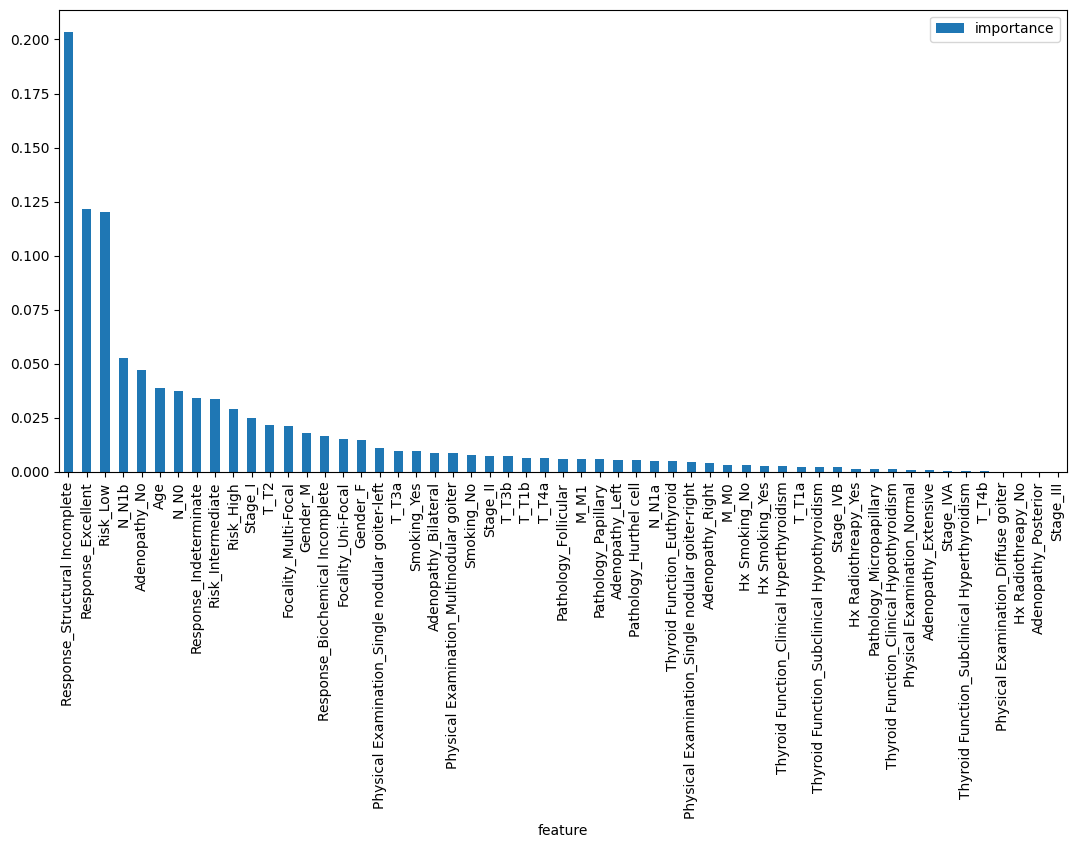

In [27]:
feature_importances_df.plot.bar(x='feature', y='importance', figsize=(13,6))

In [28]:
# look at confusion matrix
from sklearn.metrics import confusion_matrix


y_pred = final_model.predict(X_test)

con_matrix = confusion_matrix(y_test, y_pred, labels=['Yes', 'No'])

con_matrix

array([[27,  2],
       [ 1, 70]])

In [29]:
# look at classification report
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, labels=['Yes', 'No'])

print(report)

              precision    recall  f1-score   support

         Yes       0.96      0.93      0.95        29
          No       0.97      0.99      0.98        71

    accuracy                           0.97       100
   macro avg       0.97      0.96      0.96       100
weighted avg       0.97      0.97      0.97       100



In [30]:
#look at area under the ROC curve
from sklearn.metrics import roc_auc_score

# get predicted probabilities
y_pred_probs = final_model.predict_proba(X_test)[:, 1]

y_pred_probs

array([3.66024330e-04, 1.88928903e-02, 9.52880181e-01, 7.77674398e-01,
       1.85541613e-03, 8.96010505e-01, 3.39522140e-03, 3.66024330e-04,
       1.00000000e+00, 5.52572028e-01, 2.86941746e-01, 5.84960952e-03,
       3.33333333e-02, 5.13893275e-02, 5.26471360e-03, 3.75419749e-03,
       5.84960952e-03, 9.83333333e-01, 9.40409296e-01, 3.16868593e-03,
       8.85878061e-04, 1.48939180e-03, 2.37526986e-03, 1.47974298e-02,
       2.76466102e-02, 1.54115528e-01, 5.26471360e-03, 1.62270727e-01,
       2.69580485e-02, 7.14885325e-01, 6.23568337e-03, 1.47077398e-03,
       6.75134911e-01, 1.85541613e-03, 5.26471360e-03, 6.78536867e-01,
       6.23568337e-03, 9.42117698e-02, 9.69242389e-01, 9.52880181e-01,
       7.54511164e-03, 5.26471360e-03, 1.52797388e-03, 5.84960952e-03,
       5.24666699e-02, 2.37526986e-03, 0.00000000e+00, 7.54511164e-03,
       9.57052771e-01, 3.66024330e-04, 1.48939180e-03, 7.54511164e-03,
       9.07095388e-01, 3.17714386e-03, 5.26471360e-03, 1.58934411e-01,
      

In [31]:
roc_auc = roc_auc_score(y_test, y_pred_probs)
roc_auc

np.float64(0.9898008742107819)

In [32]:
from sklearn.metrics import roc_curve

#threshold value
#roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label='Yes')
thresholds



array([           inf, 1.00000000e+00, 9.85757224e-01, 9.83333333e-01,
       9.57052771e-01, 9.52880181e-01, 8.83333333e-01, 8.78393240e-01,
       8.73891691e-01, 8.15059788e-01, 4.83111281e-01, 9.42117698e-02,
       5.43359872e-02, 8.56506318e-03, 7.54511164e-03, 6.23568337e-03,
       5.86965904e-03, 5.84960952e-03, 5.26471360e-03, 3.75419749e-03,
       3.39522140e-03, 2.49072552e-03, 2.37526986e-03, 1.52797388e-03,
       1.48939180e-03, 8.85878061e-04, 3.66024330e-04, 0.00000000e+00])

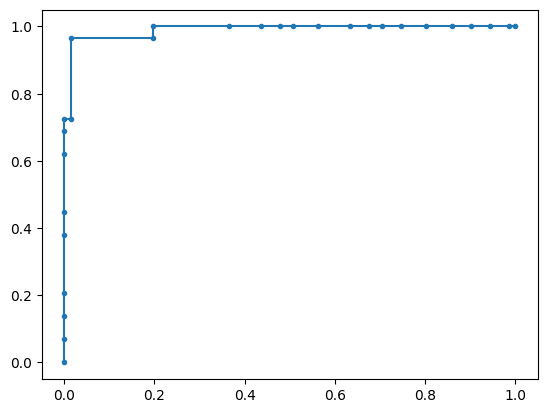

In [33]:
#plot ROC curve
#roc_auc = roc_auc_score(y_test, y_pred_probs)
#fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label='Yes')
plt.plot(fpr, tpr, marker=".")

# Break



In [34]:
#load and train decition tree
from sklearn.tree import DecisionTreeClassifier


In [35]:
# define a dection tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

In [36]:
#fit the model using the training data
dt_classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
from sklearn.metrics import accuracy_score

dt_preds = dt_classifier.predict(X_test) 
dt_accuracy = accuracy_score(y_test, dt_preds)

print(dt_accuracy)

0.95


In [38]:
max_features_option = ['sqrt', 'log2', None]

for max_features in max_features_option:

    rf_classifier = RandomForestClassifier(max_features=max_features,random_state=42)
    rf_classifier.fit(X_train,y_train)
    rf_preds = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, rf_preds)

    print(f'{max_features} {accuracy}')

sqrt 0.97
log2 0.96
None 0.96


In [39]:
n_estimators = [1, 3, 5, 7, 10, 30, 50, 70, 100]
for n in n_estimators:

    rf_classifier = RandomForestClassifier(n_estimators=n,random_state=42)
    rf_classifier.fit(X_train,y_train)
    rf_preds = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, rf_preds)

    print(f'{n} {accuracy}')

1 0.92
3 0.94
5 0.96
7 0.96


10 0.95
30 0.97
50 0.98
70 0.97
100 0.97


In [40]:
from sklearn.svm import SVC

SVC_model_1 = SVC(
    C= 1,
    class_weight='balanced',
    kernel= 'linear',
    gamma= 'scale',
    probability=True
)
SVC_model_1.fit(X_train,y_train)

SVC_model = SVC(
    C= 0.01,
    class_weight='balanced',
    kernel= 'linear',
    gamma= 'scale',
    probability=True
)
SVC_model.fit(X_train,y_train)

SVC(C=0.01, class_weight='balanced', kernel='linear', probability=True)

In [41]:

y_pred = SVC_model.predict(X_test)
report = classification_report(y_test, y_pred, target_names=['negative', 'positive'])

y_pred_1 = SVC_model_1.predict(X_test)
report_1 = classification_report(y_test, y_pred_1, target_names=['negative', 'positive'])

print(report)

              precision    recall  f1-score   support

    negative       0.93      0.93      0.93        71
    positive       0.83      0.83      0.83        29

    accuracy                           0.90       100
   macro avg       0.88      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [42]:
#assert report[75:78] == '.93'
#print(report[75:78])


0.9766877124817872


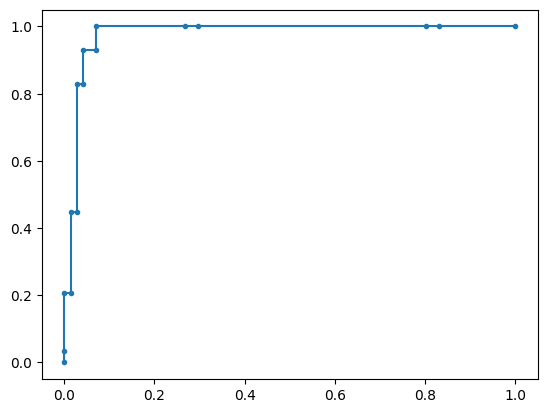

In [43]:
y_pred_probs = SVC_model_1.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label='Yes')
plt.plot(fpr, tpr, marker=".")
print(roc_auc)

0.9800874210781932


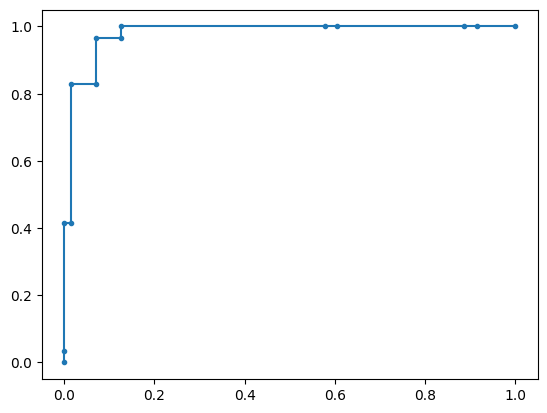

In [44]:
y_pred_probs = SVC_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs, pos_label='Yes')
plt.plot(fpr, tpr, marker=".")
print(roc_auc)

In [48]:
sac_df = pd.read_csv('Saccharomyces_combined_20250221v35.csv')
G_data_df = pd.read_csv('Graph_Data.csv')

In [87]:
uniqe = []
for prod in sac_df['product']:
    if prod not in uniqe:
        uniqe.append(prod)
for prod in G_data_df['Product']:
    if prod not in uniqe:
        uniqe.append(prod)

uniqes = {}
for prods in G_data_df['product']:
    if prods not in uniqes:
        uniqes[prods] = 1
    else:
        uniqes[prods] += 1

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import seaborn as sns

In [81]:
num = []
for prod in uniqes:
    num.append(uniqes[prod])
db_search = {'product': uniqe, 'results': num}
print(uniqes)
data = {'Product': ['linalool'], 'results': [21]}

{'Linalool': 21, 'Pregnenolone': 16, 'Lipids': 648, 'Mannitol': 96, 'mannitol': 2, 'b-Carotene': 195, 'Echinenone': 105, 'a-Ionone': 8, 'Astaxanthin': 113, 'LCDCA': 5, 'AKG': 189, 'Limonene': 167, 'Malate': 28, 'Riboflavin': 13, 'PHB': 3, 'Valencene': 5, 'Alkanes': 3, 'Methyl-ketones': 14, 'Succinate': 208, 'Lupeol': 1, 'Lycopene': 82, 'FFA': 22, '1-butanol': 33, 'Erythritol': 188, 'erythritol': 17, 'a-Santalene': 18, 'Amorphadiene': 18, 'Eriodictyol': 6, 'Canthaxanthin': 113, 'Reservatrol': 1, 'naringenin': 5, 'Naringenin': 33, 'a-Farnesene': 41, 'Campersterol': 8, 'Squalene': 86, 'Arbutin': 19, 'Octadecanol': 5, 'Protopanaxadiol': 44, 'Pentane': 10, 'Hexadecanol': 5, 'Fumarate': 20, 'Citrate': 403, 'citrate': 16, 'Betulin': 78, 'b-Ionone': 34, 'Acetate': 50, 'Ergothioneine': 3, 'Taxifolin': 6, 'Pyruvate': 146, '1-decanol': 11, 'Isocitrate': 131, 'isocitrate': 11, 'Glycogen': 6, 'FAEE': 55, 'Mevalonate': 29, 'Nootkatone': 5, 'Ethanol': 1080, 'Biomass production': 2, 'Bioethanol': 93, 

In [84]:
for prod in uniqes:
    if prod not in data['Product']:
        data['Product'].append(prod)
        data['results'].append(uniqes[prod])

In [85]:
data_df = pd.DataFrame(data)

In [98]:
data_df.shape


(372, 2)

/tmp/ipykernel_2330/2159663057.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Product', y='results', data=data_df, palette="viridis") #automatically creates the appropriate bargraph


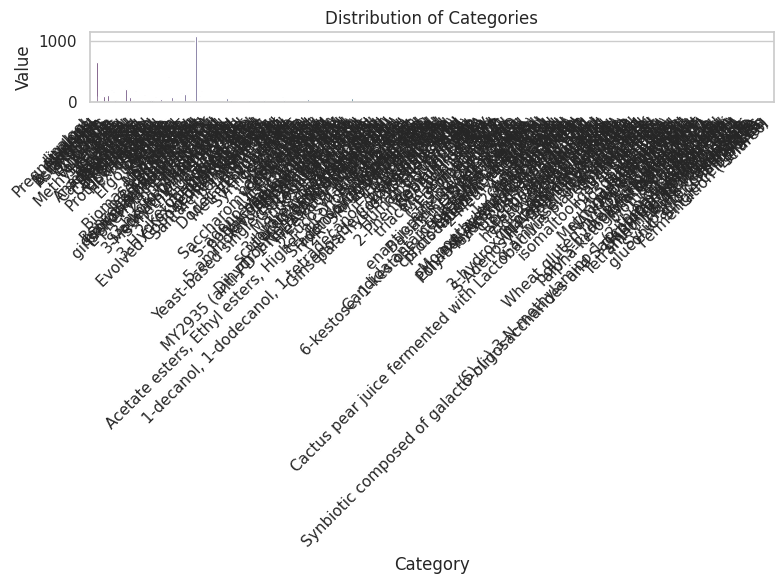

In [90]:
sns.set(style="whitegrid") #background styling

# Create the Bar Chart
plt.figure(figsize=(8, 6)) #adjust figure size
ax = sns.barplot(x='Product', y='results', data=data_df, palette="viridis") #automatically creates the appropriate bargraph

ax.set_xlabel("Category") #setting labels
ax.set_ylabel("Value")
ax.set_title("Distribution of Categories")

plt.xticks(rotation=45, ha='right') #Rotate labels
plt.tight_layout()
plt.show()